IMPORTS

In [1]:
import pandas as pd
import sklearn
import scipy
import sklearn.ensemble as forest
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import sklearn.gaussian_process as kriging
import seaborn as sns
from tensorflow import keras
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, TransformerMixin,FeatureUnion
from sklearn.preprocessing import *
from feature_engine import wrappers
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.gaussian_process import GaussianProcessRegressor
from feature_engine.creation import MathFeatures,RelativeFeatures


In [2]:
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.gaussian_process.kernels import RBF


In [59]:
class Regressor:
    def __init__(self):
        # self.n_estimators=n_estimators
        self.random_state=5
        self.models=self._define_model()
        self.models_names=list(self._define_model().keys())
        self.params_=self._models_params()
        pass

    def _models_params(self):
        random_forest_params={
            'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
            'random_state': self.random_state
        }
         
        gradient_boosting_regressor_params={}
        gradient_boosting_regressor_params['n_estimators'] = [10, 50, 100, 500]
        gradient_boosting_regressor_params['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
        gradient_boosting_regressor_params['subsample'] = [0.5, 0.7, 1.0]
        gradient_boosting_regressor_params['max_depth'] = [3, 7, 9]
        gradient_boosting_regressor_params['random_state'] = self.random_state

        ada_boost_regressor_params={
           
            'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
            'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
            'loss': ['linear', 'square', 'exponential'],  # Loss function to use
            'random_state': self.random_state
        }

        gaussian_process_paramns = {
            'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * RBF(length_scale=0.5)],  # Kernel function
            'alpha': [1e-10, 1e-5, 1e-2],  # Regularization parameter
            'random_state': self.random_state
        }

        svr_params = {
            'kernel': ['linear', 'poly', 'rbf'],  # Kernel function
            'C': [0.1, 1.0, 10.0],  # Regularization parameter
            'epsilon': [0.1, 0.01, 0.001],# Epsilon parameter for epsilon-insensitive loss
            # 'random_state': self.random_state  
        }

        xgb_regressor_params = {
        'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
        'max_depth': [3, 4, 5],  # Maximum depth of each tree
        'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
        'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
        'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
        'gamma': [0, 0.1, 0.5],  # Minimum loss reduction required to make a further partition on a leaf node
        'random_state': self.random_state
        }

        return [random_forest_params,gradient_boosting_regressor_params,ada_boost_regressor_params,gaussian_process_paramns,svr_params,xgb_regressor_params]

    def _define_model(self):

        random_forest_params={
            'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
            'random_state': self.random_state
        }
         
        gradient_boosting_regressor_params={}
        gradient_boosting_regressor_params['n_estimators'] = [10, 50, 100, 500]
        gradient_boosting_regressor_params['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
        gradient_boosting_regressor_params['subsample'] = [0.5, 0.7, 1.0]
        gradient_boosting_regressor_params['max_depth'] = [3, 7, 9]
        gradient_boosting_regressor_params['random_state'] = self.random_state

        ada_boost_regressor_params={
           
            'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
            'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
            'loss': ['linear', 'square', 'exponential'],  # Loss function to use
            'random_state': self.random_state
        }

        gaussian_process_paramns = {
            'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * RBF(length_scale=0.5)],  # Kernel function
            'alpha': [1e-10, 1e-5, 1e-2],  # Regularization parameter
            'random_state': self.random_state
        }

        svr_params = {
            'kernel': ['linear', 'poly', 'rbf'],  # Kernel function
            'C': [0.1, 1.0, 10.0],  # Regularization parameter
            'epsilon': [0.1, 0.01, 0.001],# Epsilon parameter for epsilon-insensitive loss
            # 'random_state': self.random_state  
        }

        xgb_regressor_params = {
        'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
        'max_depth': [3, 4, 5],  # Maximum depth of each tree
        'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
        'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
        'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
        'gamma': [0, 0.1, 0.5],  # Minimum loss reduction required to make a further partition on a leaf node
        'random_state': self.random_state
        }

        models={
            'RandomForestRegressor': RandomForestRegressor(),
            'GradienteBoostingRegressor': GradientBoostingRegressor(),
            'AdaBoostRegressor': AdaBoostRegressor(),
            'GaussianProcessRegressor': GaussianProcessRegressor(),
            'SVR':SVR(),
            'XGBRFRegressor':XGBRegressor()
        }
        
        return models
        



Classes

In [4]:
# class ColumnTransformer(TransformerMixin):
#     def __init__(self,cols):   
#         self.cols=cols

#     def transform(self,X):
#         Xcols=X[self.cols]
#         return Xcols
    
#     def fit(self,X,y=None):
#         return self


Tratamento Dos Dados

In [5]:
dfx=pd.DataFrame(pd.read_csv(filepath_or_buffer='DadosMetamodelagemX1.csv',delimiter=',',index_col=False,names=['ReactionTemperature','H2FlowRate','SplitsValues','RefluxRatio','ReactorVolume','FeedPressure','NANx']))
dfy=pd.DataFrame(pd.read_csv('DadosMetamodelagemY1.csv',names=['ISBL','CustoMateriaPrima','CustoUtilidades','Methanol','IsValid','IsConverged','StreamConvergeance','NANy']))
dft=pd.DataFrame.join(dfx,dfy)
dft.drop(dft.loc[dft['StreamConvergeance']==False].index,inplace=True)
dft.drop(columns=['NANx','NANy','IsValid','StreamConvergeance','IsConverged'],inplace=True)
dft.reset_index(inplace=True,drop=True)
TotalCost=pd.DataFrame({'TotalCost':(dft['ISBL']+dft['CustoUtilidades']+dft['CustoMateriaPrima'])})
dft=dft.join(TotalCost)
target=['TotalCost','Methanol','ISBL','CustoUtilidades','CustoMateriaPrima']
features=['ReactionTemperature','H2FlowRate','SplitsValues','RefluxRatio','ReactorVolume','FeedPressure']
x_train,x_test,y_train,y_test=model_selection.train_test_split(dft[features],dft[target],test_size=0.33)
train_test_data_list=[x_train,x_test,y_train,y_test]
for i in train_test_data_list:
    i.reset_index(inplace=True,drop=True)
df_train=x_train.join(y_train)
df_test=x_test.join(y_test)

HeatMap Das Correlações

Text(0.5, 1.0, 'TESTE')

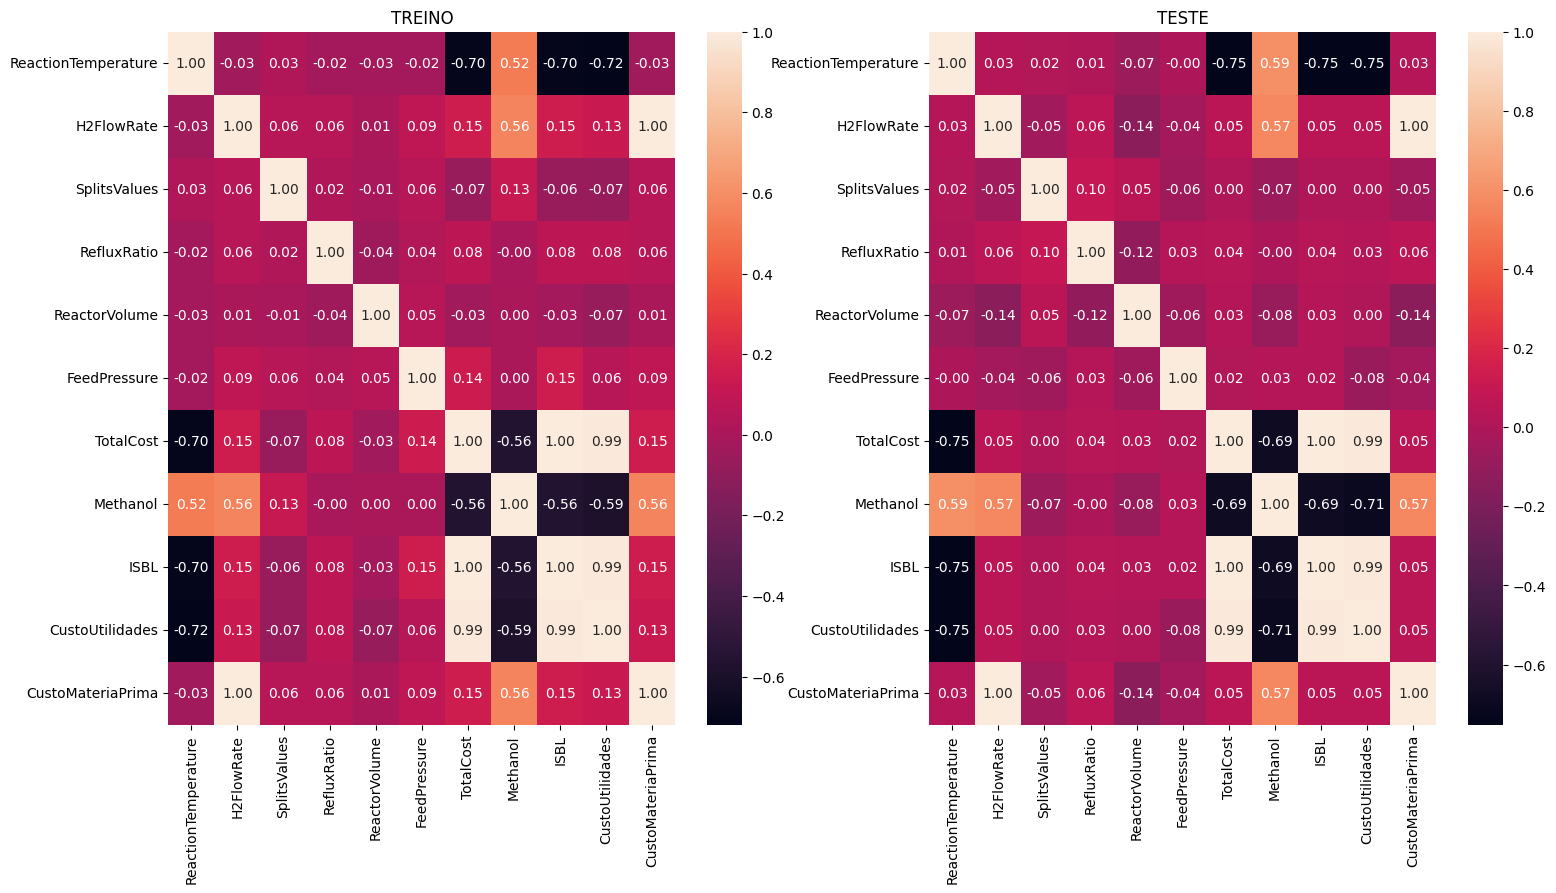

In [6]:

fig,axes=plt.subplots(1,2,figsize=(18,9))

sns.heatmap(df_train.corr(),annot=True,annot_kws={'size':'10'},fmt='.2f',ax=axes[0])
sns.heatmap(df_test.corr(),annot=True,annot_kws={'size':'10'},fmt='.2f',ax=axes[1])
axes[0].set_title('TREINO')
axes[1].set_title('TESTE')

ISBL , CustoUtilidades e CustoMateriaPrima são Targets redundantes, portanto TAC, Methanol e serão trabalhados

In [7]:
for i in [dft,df_train,df_test,y_train,y_test]:
    i.drop(columns=['ISBL','CustoUtilidades','CustoMateriaPrima'],inplace=True)

Text(0.5, 0.98, 'Teste')

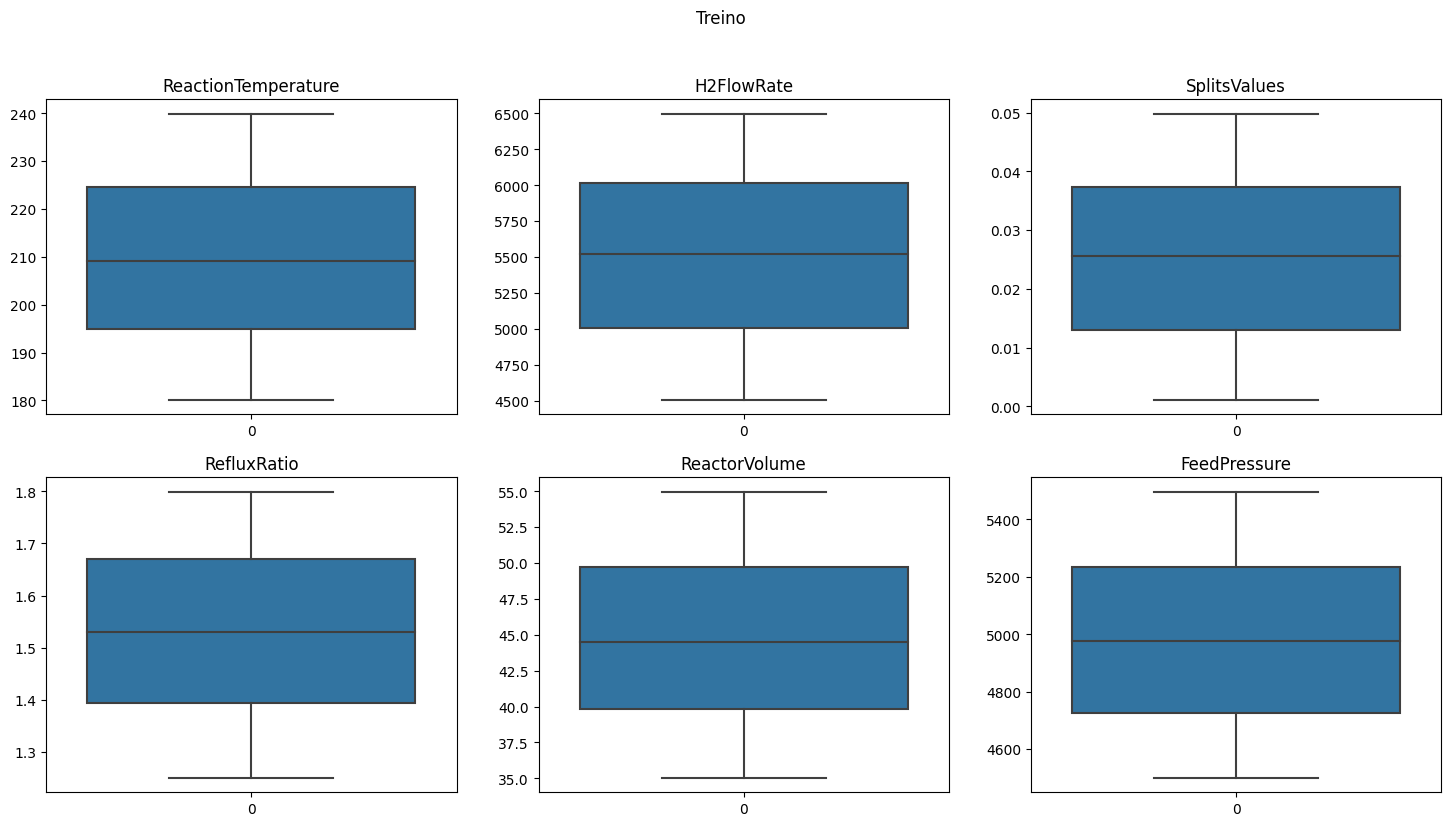

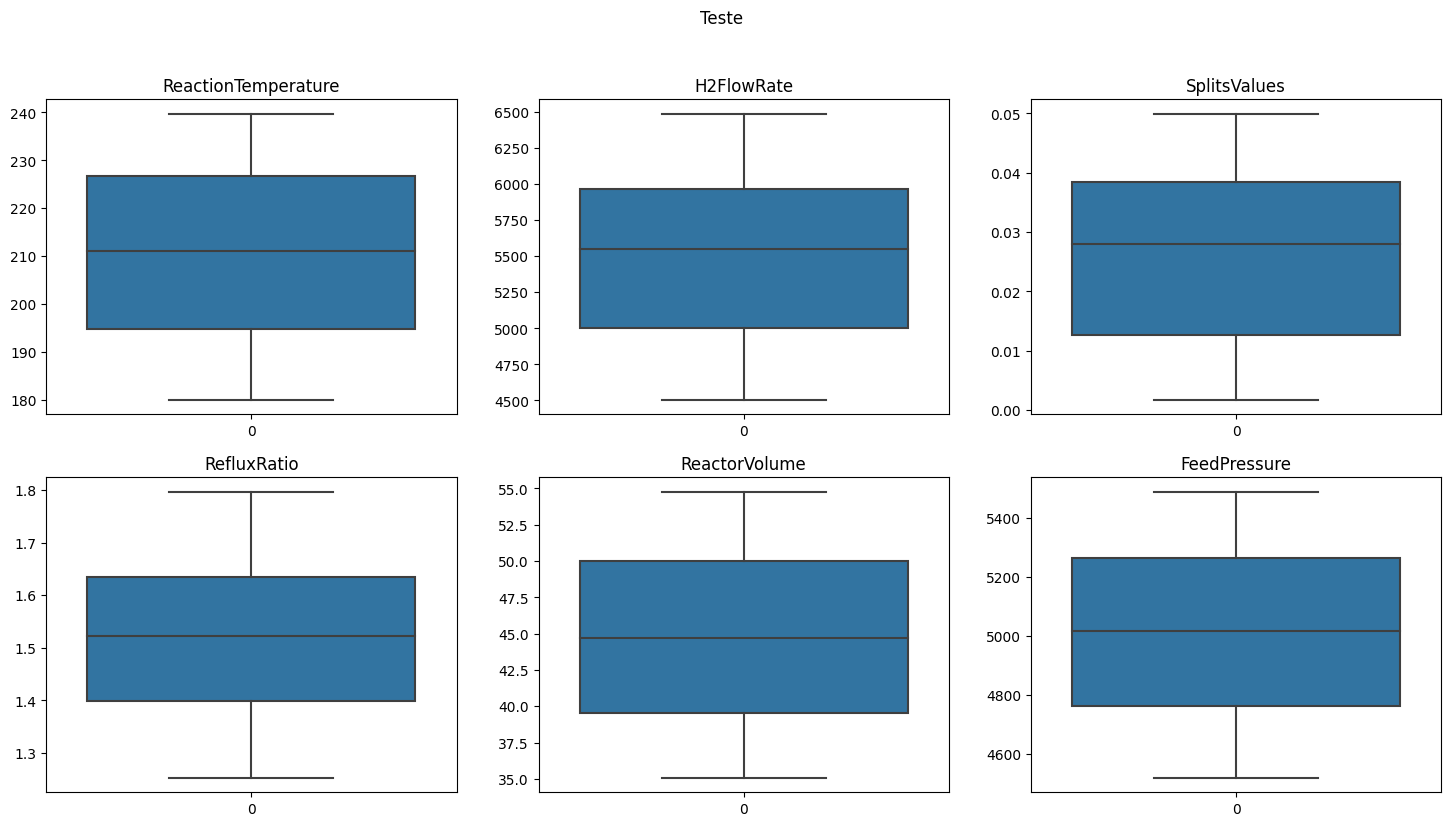

In [8]:

target=['TotalCost','Methanol']
fig,axes=plt.subplots(2,3,figsize=(18,9))
axesf=axes.flatten()
for i, columns in enumerate(df_train[features].columns.to_list()):
    ax=axesf[i]
    ax.set_title(columns)
    sns.boxplot(df_train[columns],ax=ax)

fig.suptitle('Treino')


fig,axes=plt.subplots(2,3,figsize=(18,9))
axesf=axes.flatten()
for i, columns in enumerate(df_test[features].columns.to_list()):
    ax=axesf[i]
    ax.set_title(columns)
    sns.boxplot(df_test[columns],ax=ax)

fig.suptitle('Teste')


Text(0.5, 0.98, 'Teste')

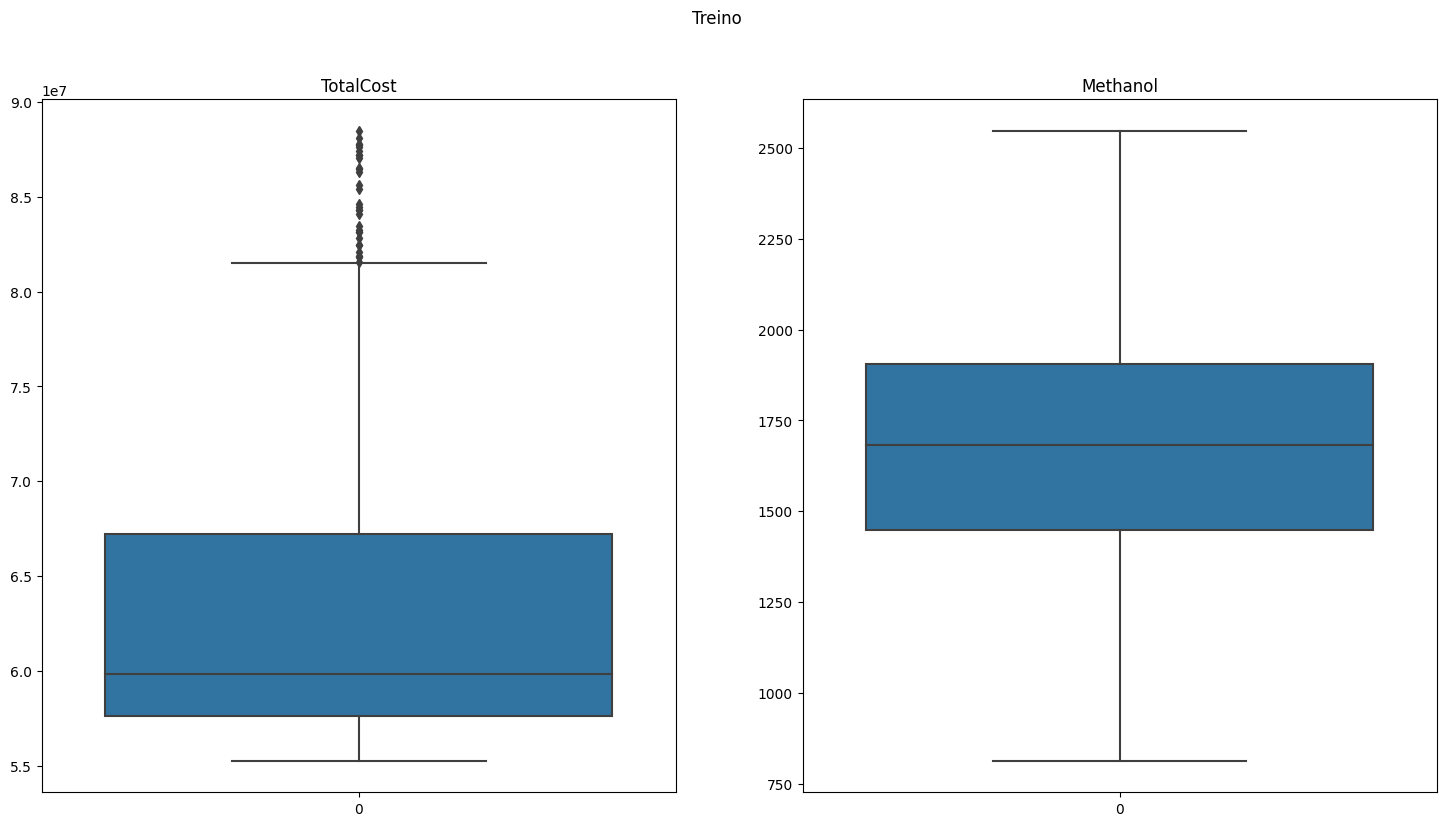

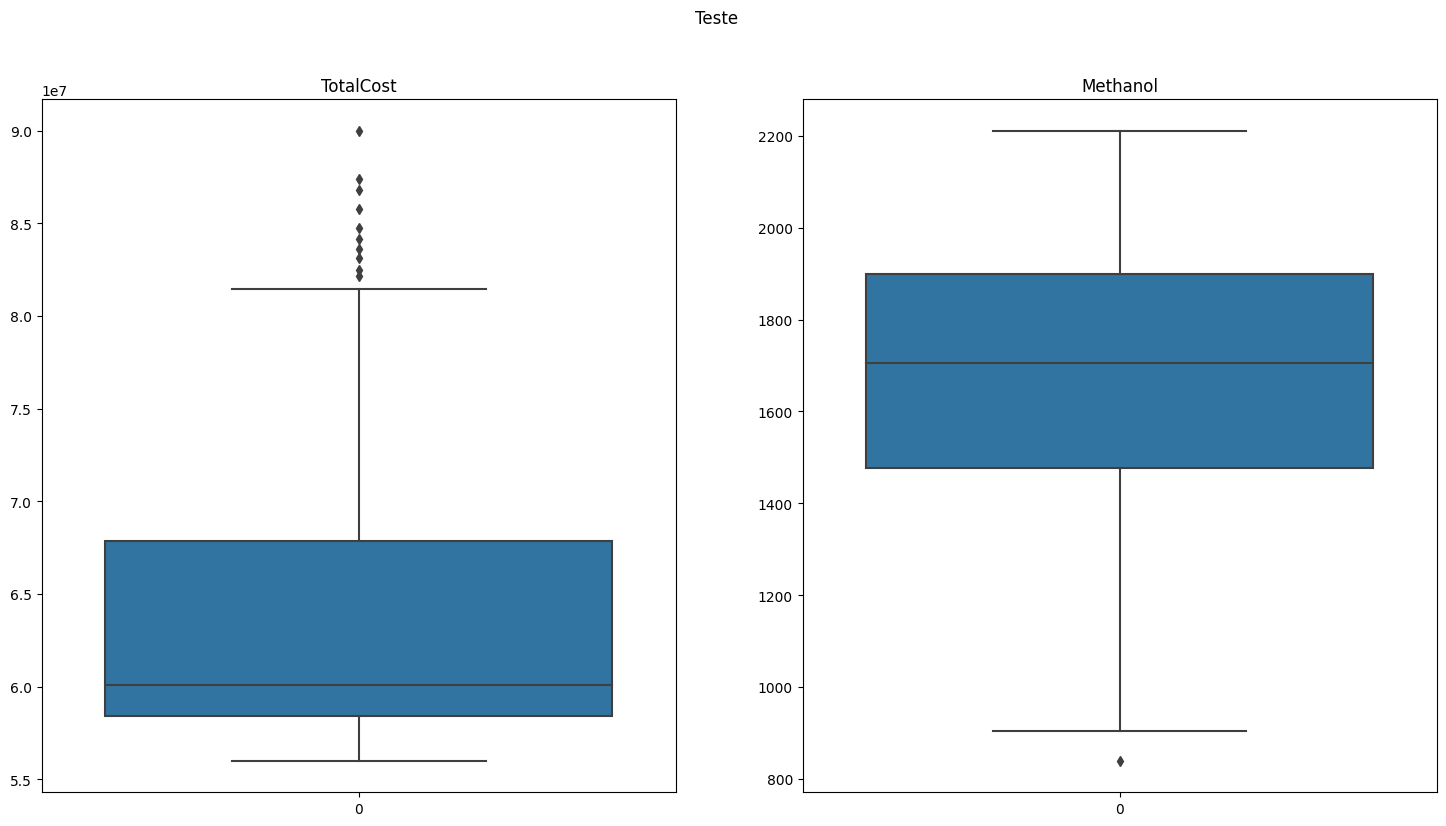

In [9]:

fig,axes=plt.subplots(1,2,figsize=(18,9))
axesf=axes.flatten()
for i, columns in enumerate(df_train[target].columns.to_list()):
    ax=axesf[i]
    ax.set_title(columns)
    sns.boxplot(df_train[columns],ax=ax)

fig.suptitle('Treino')


fig,axes=plt.subplots(1,2,figsize=(18,9))
axesf=axes.flatten()
for i, columns in enumerate(df_test[target].columns.to_list()):
    ax=axesf[i]
    ax.set_title(columns)
    sns.boxplot(df_test[columns],ax=ax)

fig.suptitle('Teste')

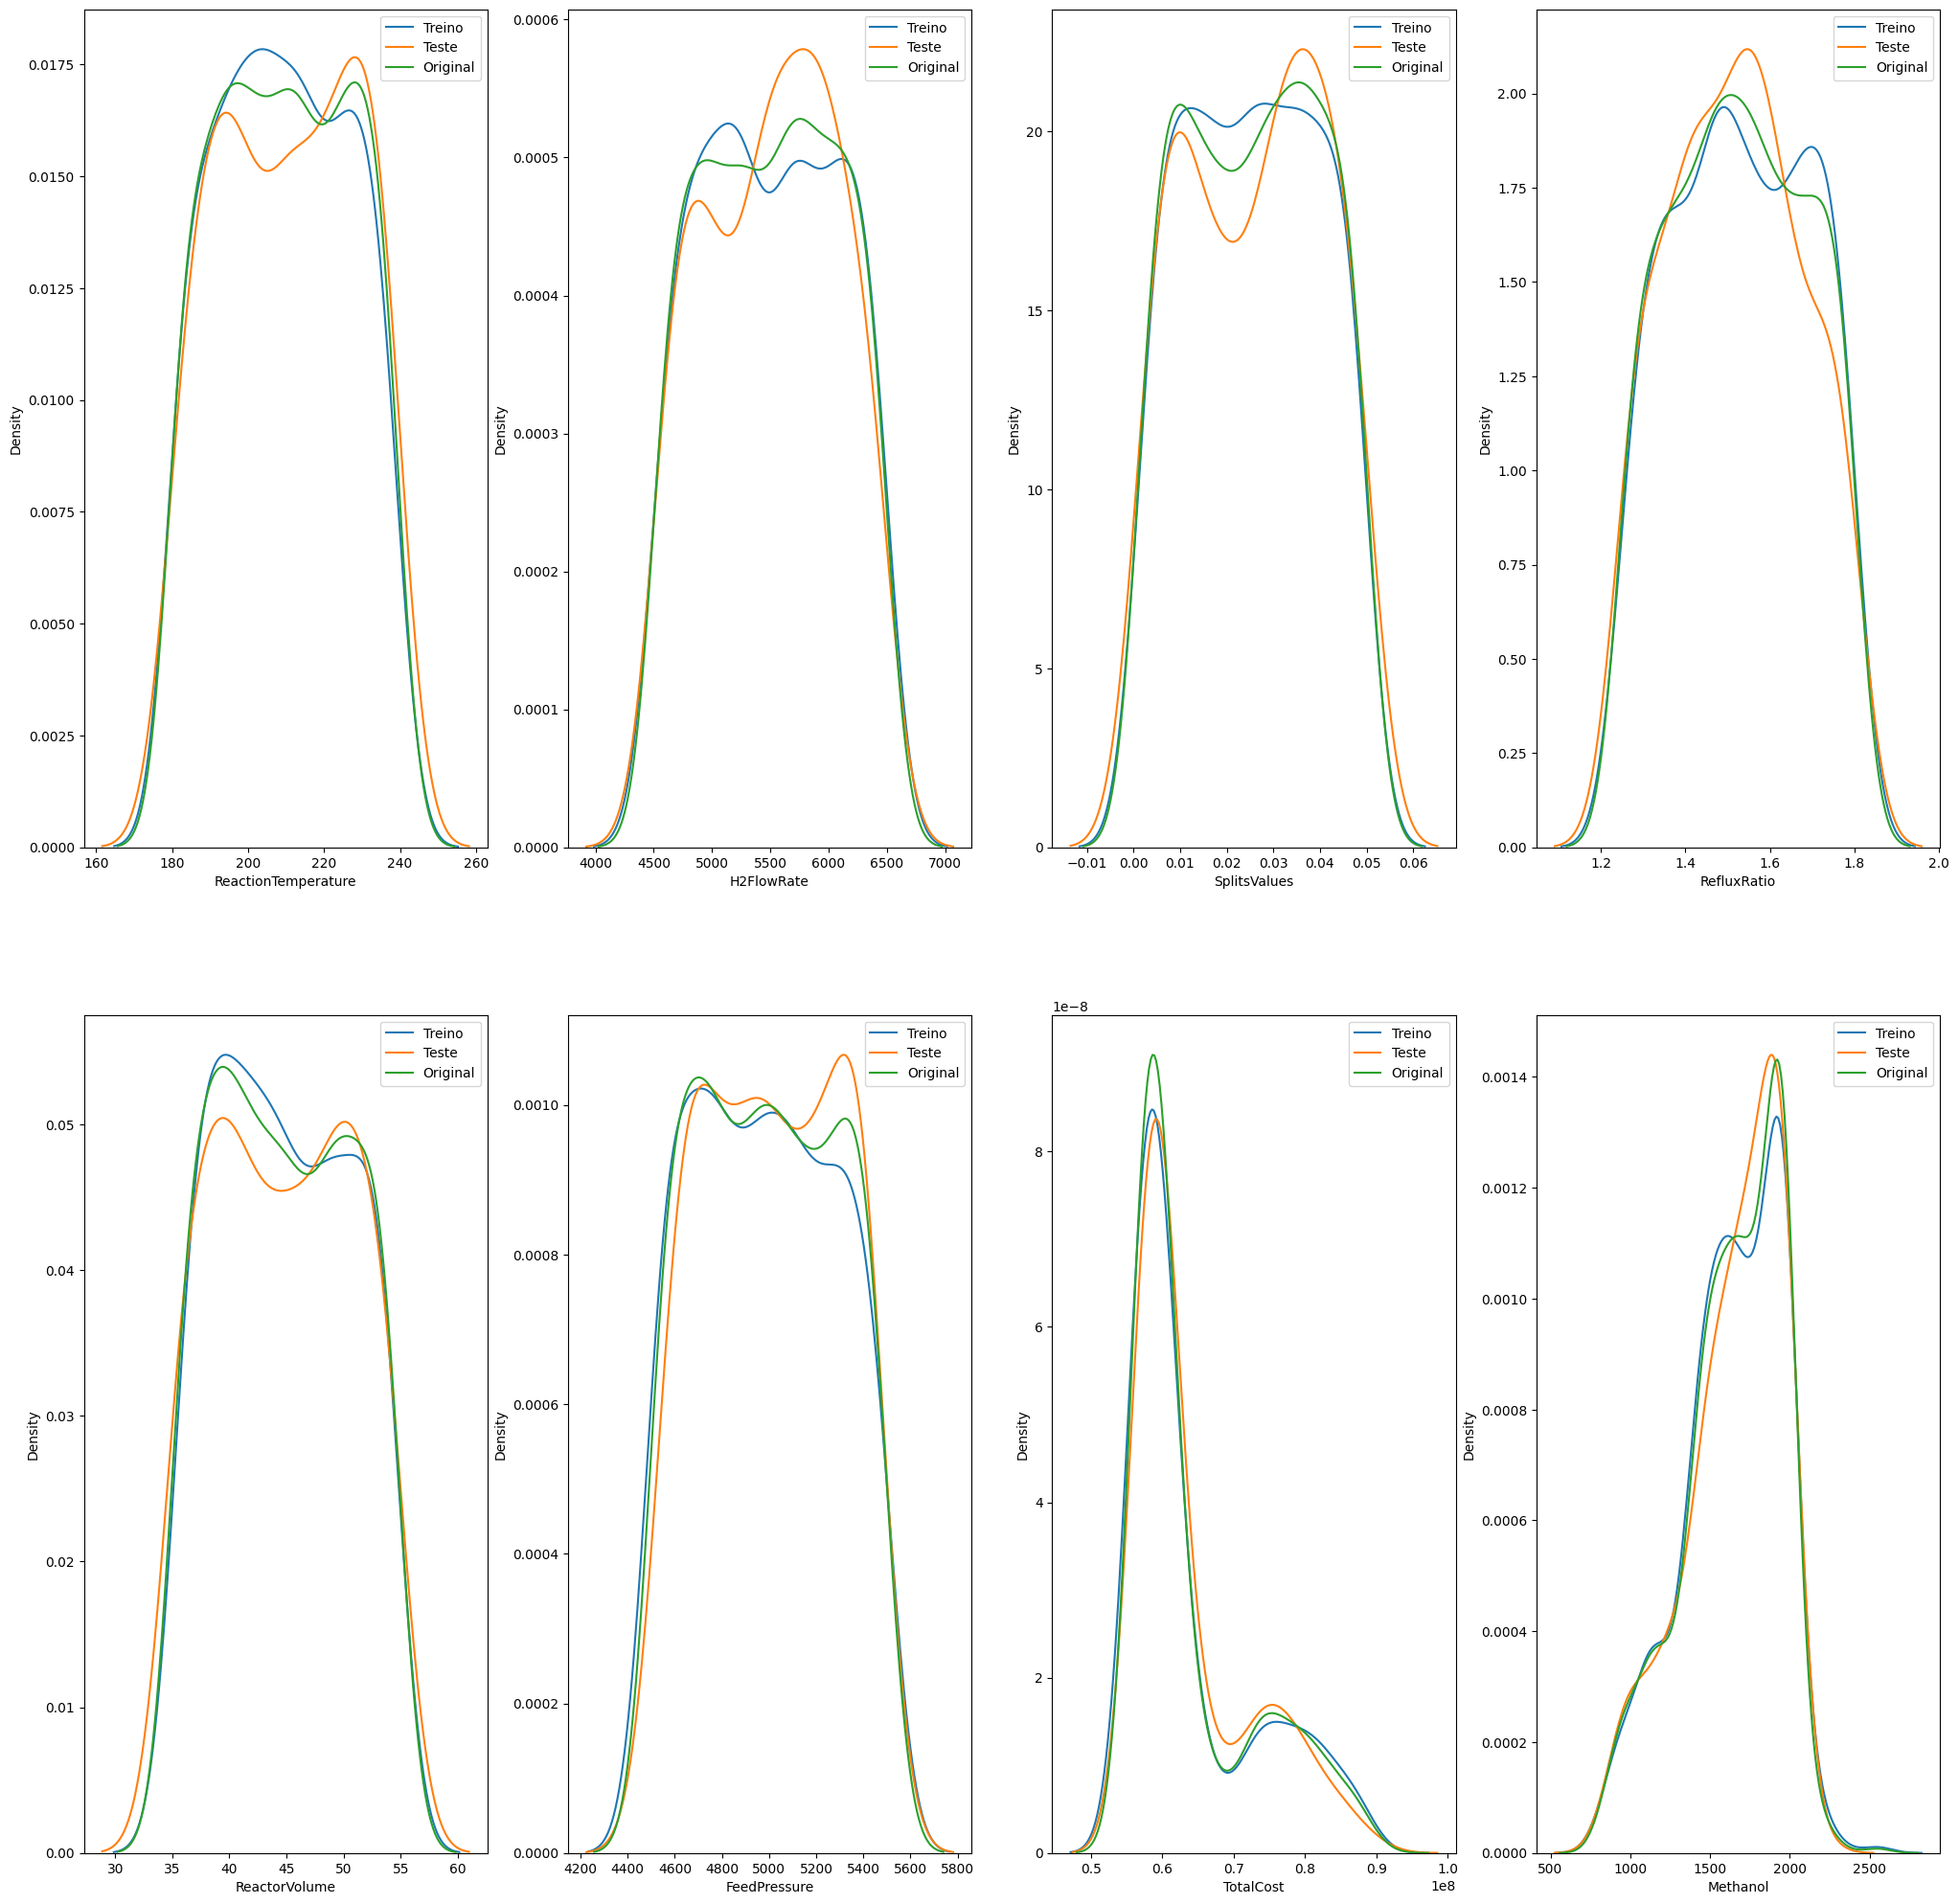

In [10]:

fig,axes=plt.subplots(2,4,figsize=(25,25))
axesf=axes.flatten()
for i, columns in enumerate(df_train.columns.to_list()):
    ax=axesf[i]
    sns.kdeplot(df_train[columns],ax=ax)
    sns.kdeplot(df_test[columns],ax=ax)
    sns.kdeplot(dft[columns],ax=ax)
    ax.legend(['Treino','Teste','Original'])
    
    
    

TAC e Methanol com OUTLIERS, tratamento de dados a serem aplicados:

Para modelos baseados em regressão é preferível que os targets possuam distribuição gaussiana e as features possuam a mesma escala

In [14]:
target_transformer=ColumnTransformer([('target_transformer',QuantileTransformer(),target)])
target_transformer.set_output(transform='pandas')
y_train=target_transformer.fit_transform(y_train)
y_test=target_transformer.transform(y_test)

ValueError: A given column is not a column of the dataframe

In [61]:
regressor=Regressor()
models=regressor.models
regressor._models_params()

[{'bootstrap': [True, False],
  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
  'random_state': 5},
 {'n_estimators': [10, 50, 100, 500],
  'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
  'subsample': [0.5, 0.7, 1.0],
  'max_depth': [3, 7, 9],
  'random_state': 5},
 {'n_estimators': [50, 100, 200],
  'learning_rate': [0.1, 0.5, 1.0],
  'loss': ['linear', 'square', 'exponential'],
  'random_state': 5},
 {'kernel': [1**2 * RBF(length_scale=1), 1**2 * RBF(length_scale=0.5)],
  'alpha': [1e-10, 1e-05, 0.01],
  'random_state': 5},
 {'kernel': ['linear', 'poly', 'rbf'],
  'C': [0.1, 1.0, 10.0],
  'epsilon': [0.1, 0.01, 0.001]},
 {'learning_rate': [0.1, 0.01, 0.001],
  'max_depth': [3, 4, 5],
  'subsample': [0.8, 0.9, 1.0],
  'colsample_bytree': [0.8, 0.9, 1.0],
  'reg_alpha': [0, 0.1, 0.5],
  'r

In [12]:

feature_trans=Pipeline([('CreateFeatures',RelativeFeatures(variables=['FeedPressure','ReactionTemperature','H2FlowRate'],reference=['ReactorVolume'],func=['div'])),
                             ('StandardScaler',StandardScaler())])

model=Pipeline([('feature_trans',feature_trans),('tree','')])